# Notebook for generating coverage plots for genes with dynamic CCANs (cis-regulatory elements change over time)

- Last updated: 11/7/2023
- Author: Yang-Joon Kim

- Goals:
    1) For genes with dynamic CCANs (computed in "comparison_CCANs_timepoints.ipynb notebook), we want to generate coverage plots from Signac, but with our own style.
    


In [1]:
# Load the libraries
library(Seurat)
library(Signac)
library(patchwork)
library(ggplot2)


The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.

Attaching SeuratObject

‘SeuratObject’ was built under R 4.3.0 but the current version is
4.3.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

Signac built for for SeuratObject v4 was just loaded with SeuratObject
v5; disabling v5 assays and validation routines, and ensuring assays
work in strict v3/v4 compatibility mode



In [2]:
# Load the plotting module
source("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/scripts/coverage_plot_viz_module.R")

In [3]:
# import the Seurat object
TDR118 <- readRDS("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118_cicero_output/TDR118_gene_activity.RDS")
TDR118

An object of class Seurat 
1080486 features across 13022 samples within 6 assays 
Active assay: ATAC (248320 features, 0 variable features)
 2 layers present: counts, data
 5 other assays present: RNA, SCT, peaks_bulk, peaks_celltype, Gene.Activity
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.joint

In [4]:
# ### NOTE: This step is not required anymore (any dataset that is processed using snakemake pipeline)
# # since we moved between servers, we need to update the filepath for the "Fragment" object within the Seurat object
# # NOTE that we need to update it manually for every Signac object (ATAC object)
# TDR118@assays$ATAC@fragments[[1]]@path <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118/outs/atac_fragments.tsv.gz"
# TDR118@assays$peaks_celltype@fragments[[1]]@path <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118/outs/atac_fragments.tsv.gz"
# TDR118@assays$peaks_bulk@fragments[[1]]@path <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118/outs/atac_fragments.tsv.gz"

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


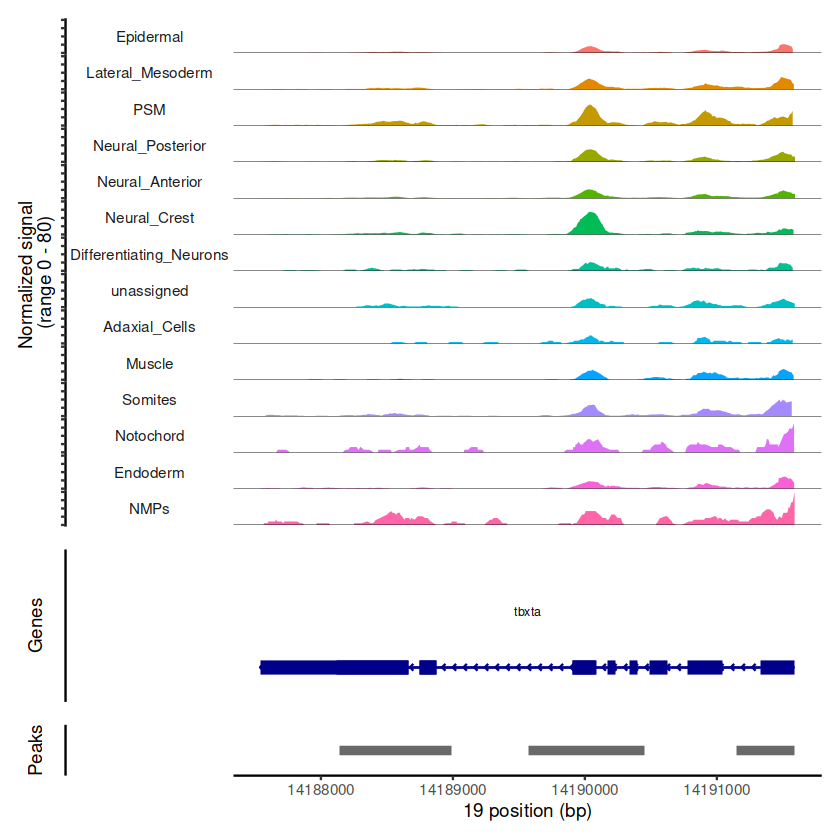

In [4]:
# generate a coverage plot using Signac's basic function (CoveragePlot)
# CoveragePlot uses "active.ident" annotation class (adata.obs) for grouping the "ATAC" raw data 
CoveragePlot(TDR118, region = "tbxta")

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


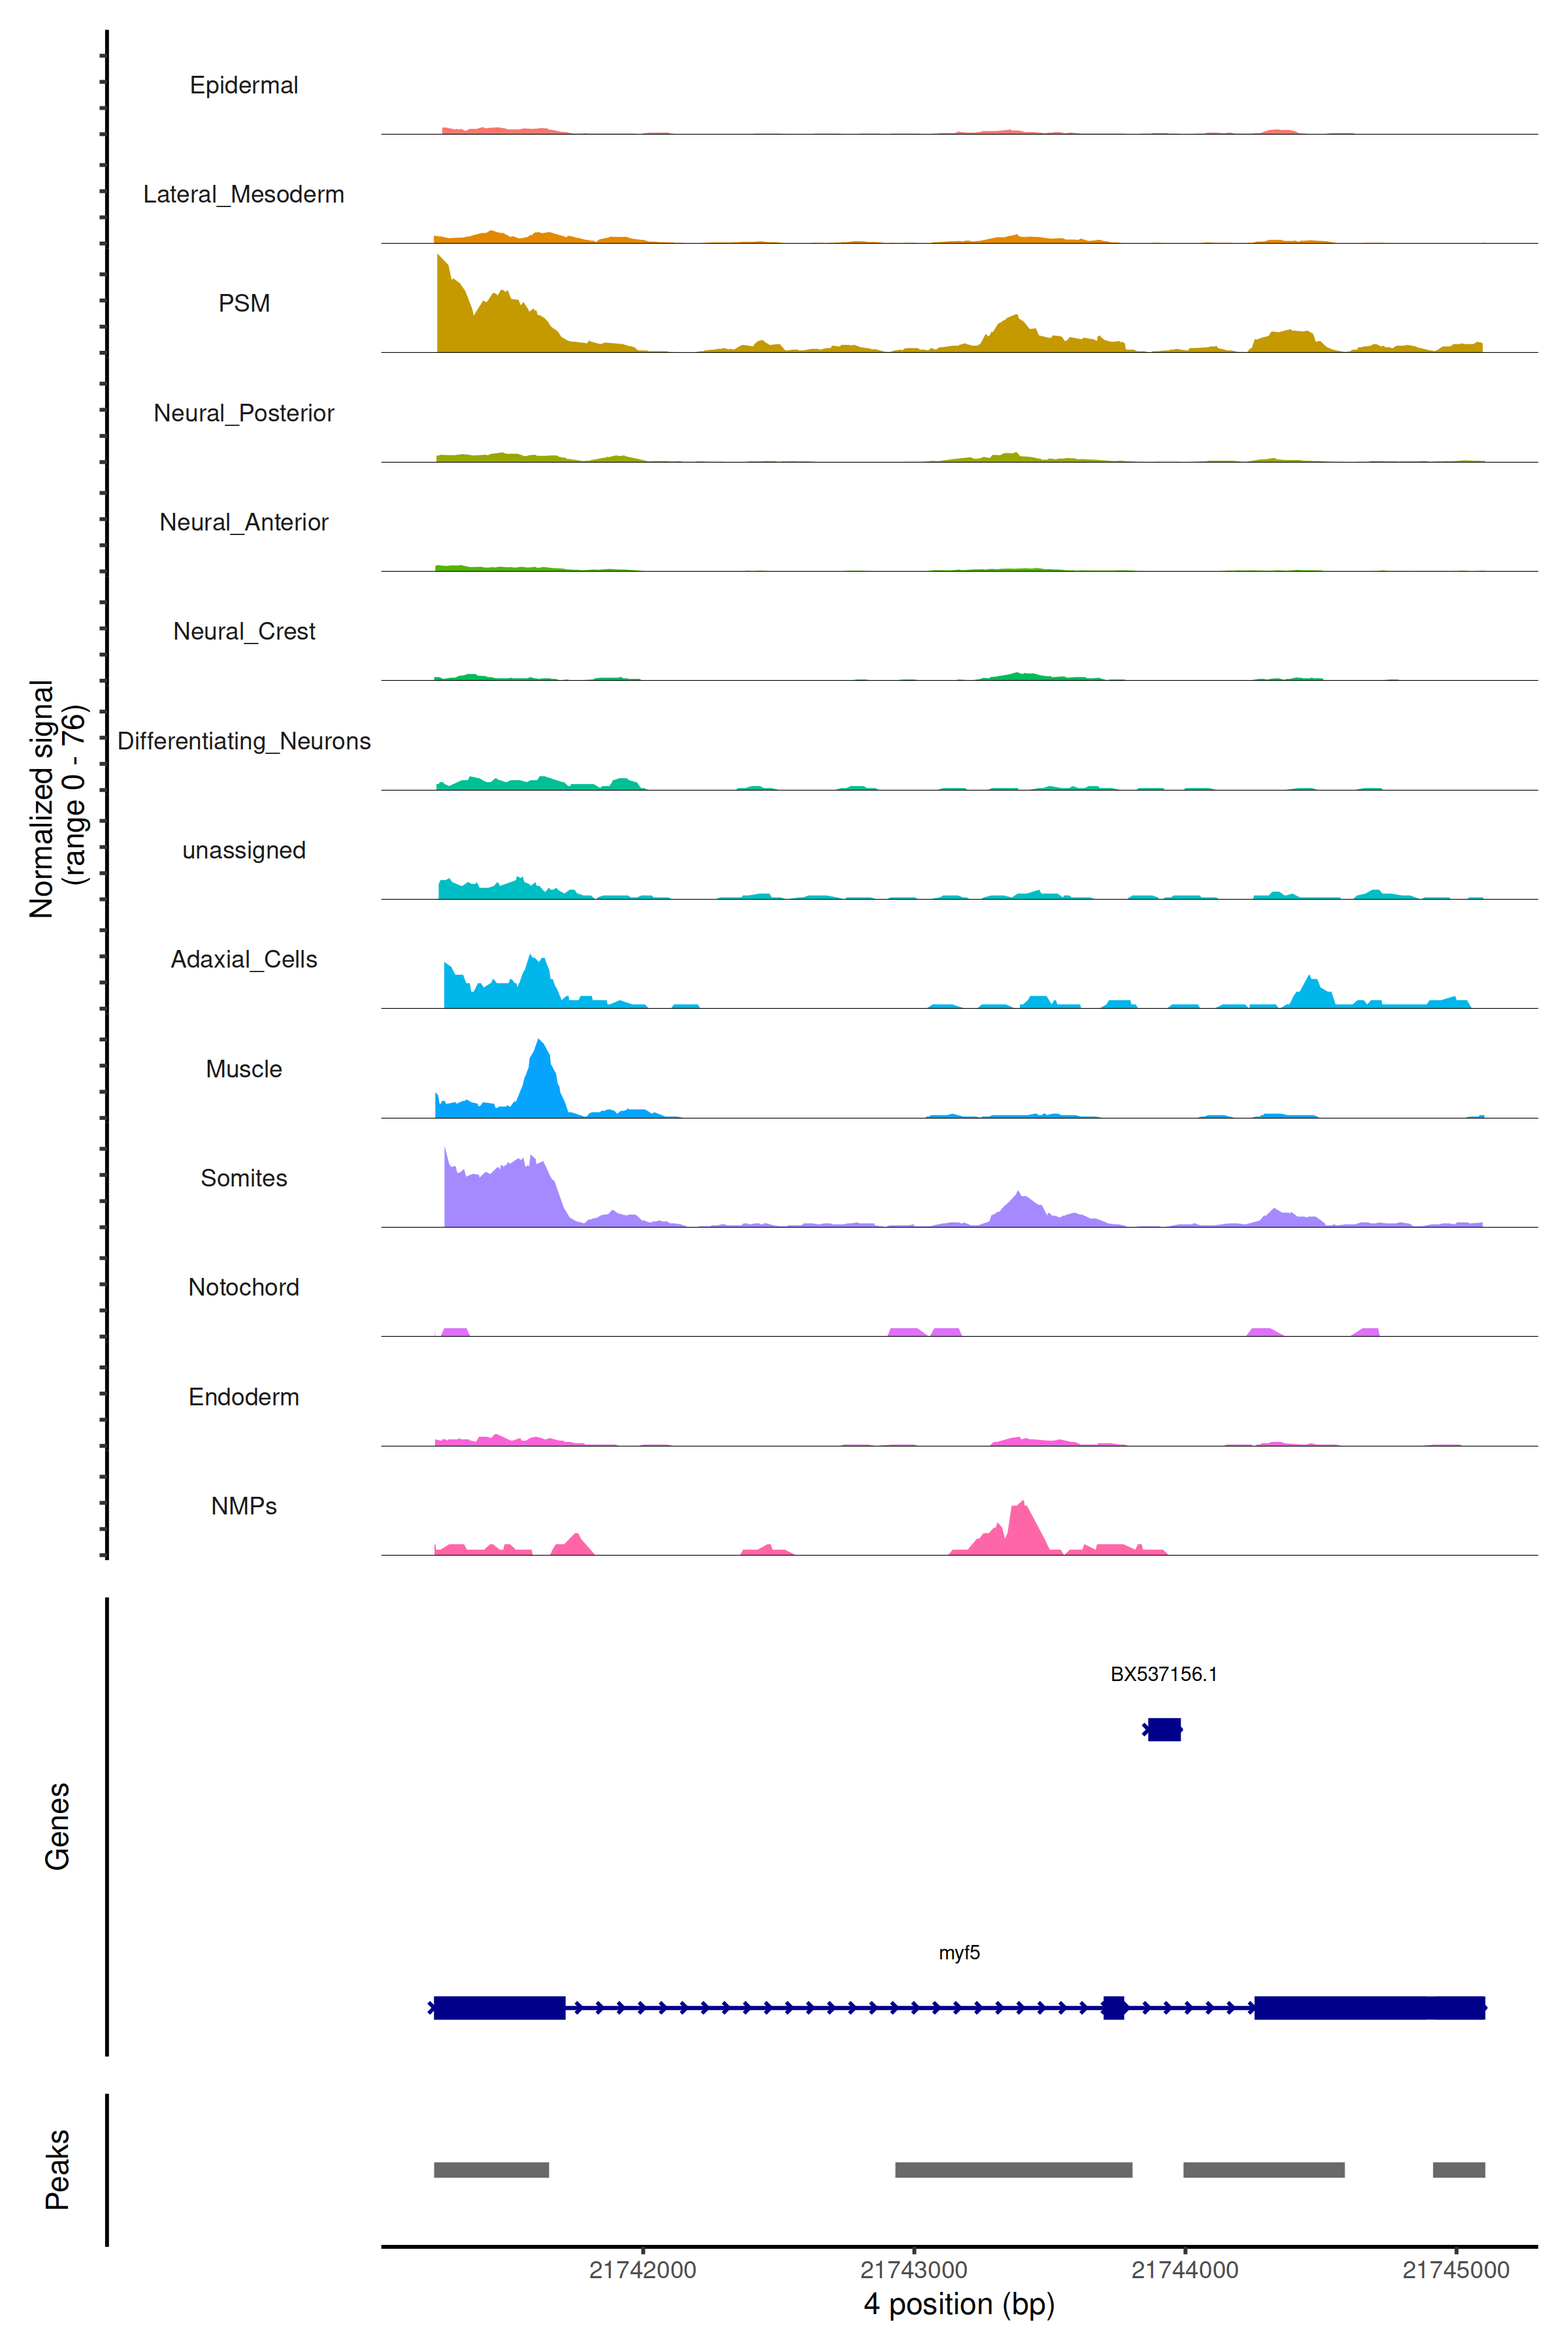

In [28]:
# generate a coverage plot using Signac's basic function (CoveragePlot)
# CoveragePlot uses "active.ident" annotation class (adata.obs) for grouping the "ATAC" raw data 
CoveragePlot(TDR118, region = "myf5")

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


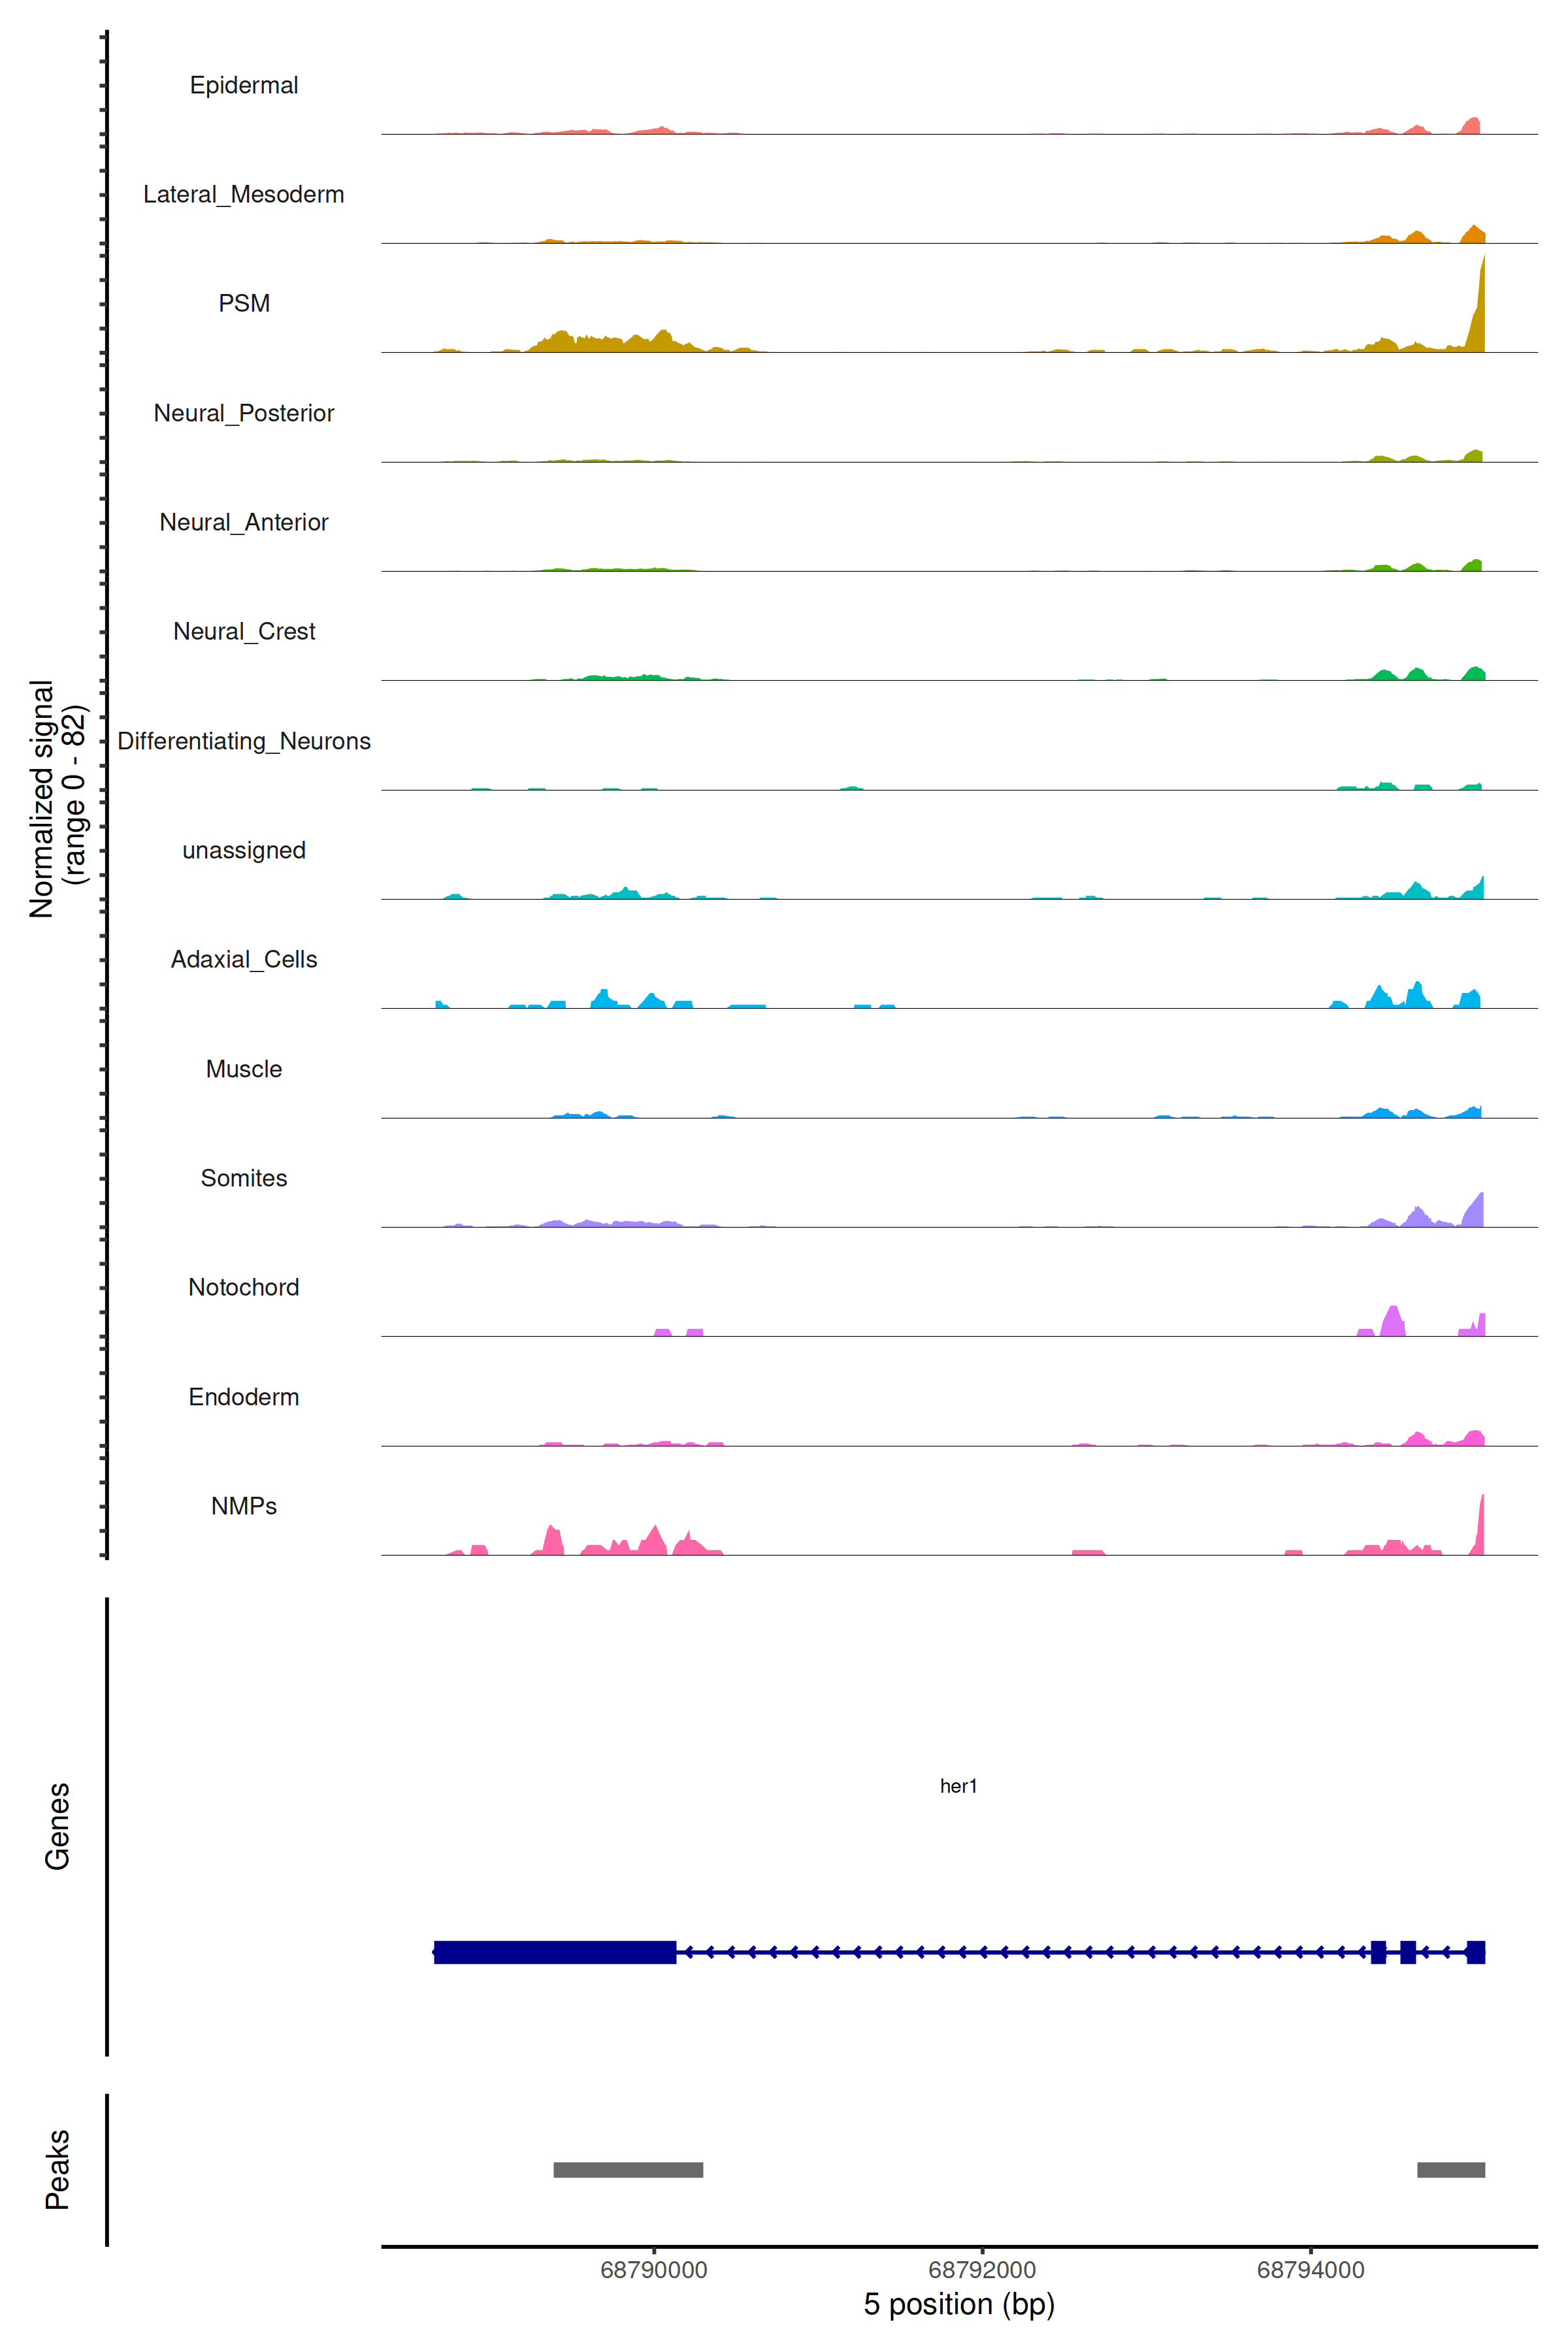

In [29]:
# generate a coverage plot using Signac's basic function (CoveragePlot)
# CoveragePlot uses "active.ident" annotation class (adata.obs) for grouping the "ATAC" raw data 
CoveragePlot(TDR118, region = "her1")

In [5]:
# import the list of genes with "dynamic" CCAN
unique_peaks_15_20 <- read.csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/EDA/comparison_CCANs_timepoints/unique_peaks_15somites_to_20somites.csv")
head(unique_peaks_15_20)

top_50_genes_peaks_15_20 <- read.csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/EDA/comparison_CCANs_timepoints/top50_gene_more_CCANs_15somites_to_20somites.csv")
head(top_50_genes_peaks_15_20)

,X,peak_id,gene_short_name
,<int>,<chr>,<chr>
1,0,chr20_11105433_11106108,flrt2
2,1,chr20_15600154_15601120,faslg
3,2,chr20_19543851_19544737,mir133b
4,3,chr20_19543851_19544737,mir206-1
5,4,chr20_26066940_26067539,myct1a
6,5,chr20_26682270_26682988,foxq1b


,gene_short_name,X0
,<chr>,<int>
1,myf5,7
2,mir196a-1,6
3,her1,6
4,hoxb3a,4
5,her7,4
6,tbx16,4


In [7]:
list_genes <- top_50_genes_peaks_15_20$gene_short_name
list_genes

[1] "myf5"            "mir196a-1"       "her1"            "hoxb3a"         
 [5] "her7"            "tbx16"           "cyp26a1"         "mir196b"        
 [9] "hoxc3a"          "hoxc6a"          "fezf2"           "usp54a"         
[13] "ncam1a"          "mir196a-2"       "tbx6"            "mir196d"        
[17] "msgn1"           "sox10"           "ecrg4a"          "elavl3"         
[21] "slc9a3.1"        "fam131c"         "slc39a14"        "cpa4"           
[25] "fn1b"            "foxc1a"          "six3a"           "si:dkey-30k22.5"
[29] "gpa33a"          "col28a1a"        "cnksr1"          "cmn"            
[33] "spaw"            "hoxd11a"         "hoxb8b"          "mfap4"          
[37] "neurog1"         "neurog3"         "mvb12bb"         "moxd1l"         
[41] "olig1"           "mir205"          "pappab"          "mir124-5"       
[45] "pcdh8"           "plp1a"           "cdx4"            "pou2f3"         
[49] "rargb"           "krt17"

## Notes:

- We need to tune the "region" as the CCANs were computed over 500kb distances, so the CCANs span wider than the genomic region (extracted from Ensemble).

- 

In [16]:
# extract the genomic region spanning all CCANs detected by Cicero (co-access>=0.8)
gene_name = "myf5"
df <- unique_peaks_15_20[unique_peaks_15_20$gene_short_name==gene_name,]

# Split the 'peak_id' column into separate columns
split_peaks <- strsplit(df$peak_id, "_")
split_df <- do.call(rbind, split_peaks)

# Convert character vectors to a matrix, then to a data frame
split_df <- data.frame(matrix(unlist(split_peaks), ncol=3, byrow=TRUE), stringsAsFactors=FALSE)

# Rename the new columns
colnames(split_df) <- c("chr", "start", "end")

# Convert start and end to numeric so min and max can be computed
split_df$start <- as.numeric(split_df$start)
split_df$end <- as.numeric(split_df$end)

# Get the min and max for start and end positions
min_start <- min(split_df$start)
max_end <- max(split_df$end)

# Create a new 'peak_range' column with the format "chr-start-end"
df$peak_range <- paste(split_df$chr[1], min_start, max_end, sep="-")

# Now df has a new column 'peak_range' that contains the range in the desired format
df$X <- NULL  # This will remove the column 'X' from your dataframe
print(df)

                   peak_id gene_short_name             peak_range
317 chr4_21640698_21641565            myf5 chr4-21640698-21746718
318 chr4_21660593_21661497            myf5 chr4-21640698-21746718
319 chr4_21696596_21697063            myf5 chr4-21640698-21746718
320 chr4_21724146_21724976            myf5 chr4-21640698-21746718
321 chr4_21738624_21739481            myf5 chr4-21640698-21746718
322 chr4_21744914_21745703            myf5 chr4-21640698-21746718
323 chr4_21745860_21746718            myf5 chr4-21640698-21746718


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


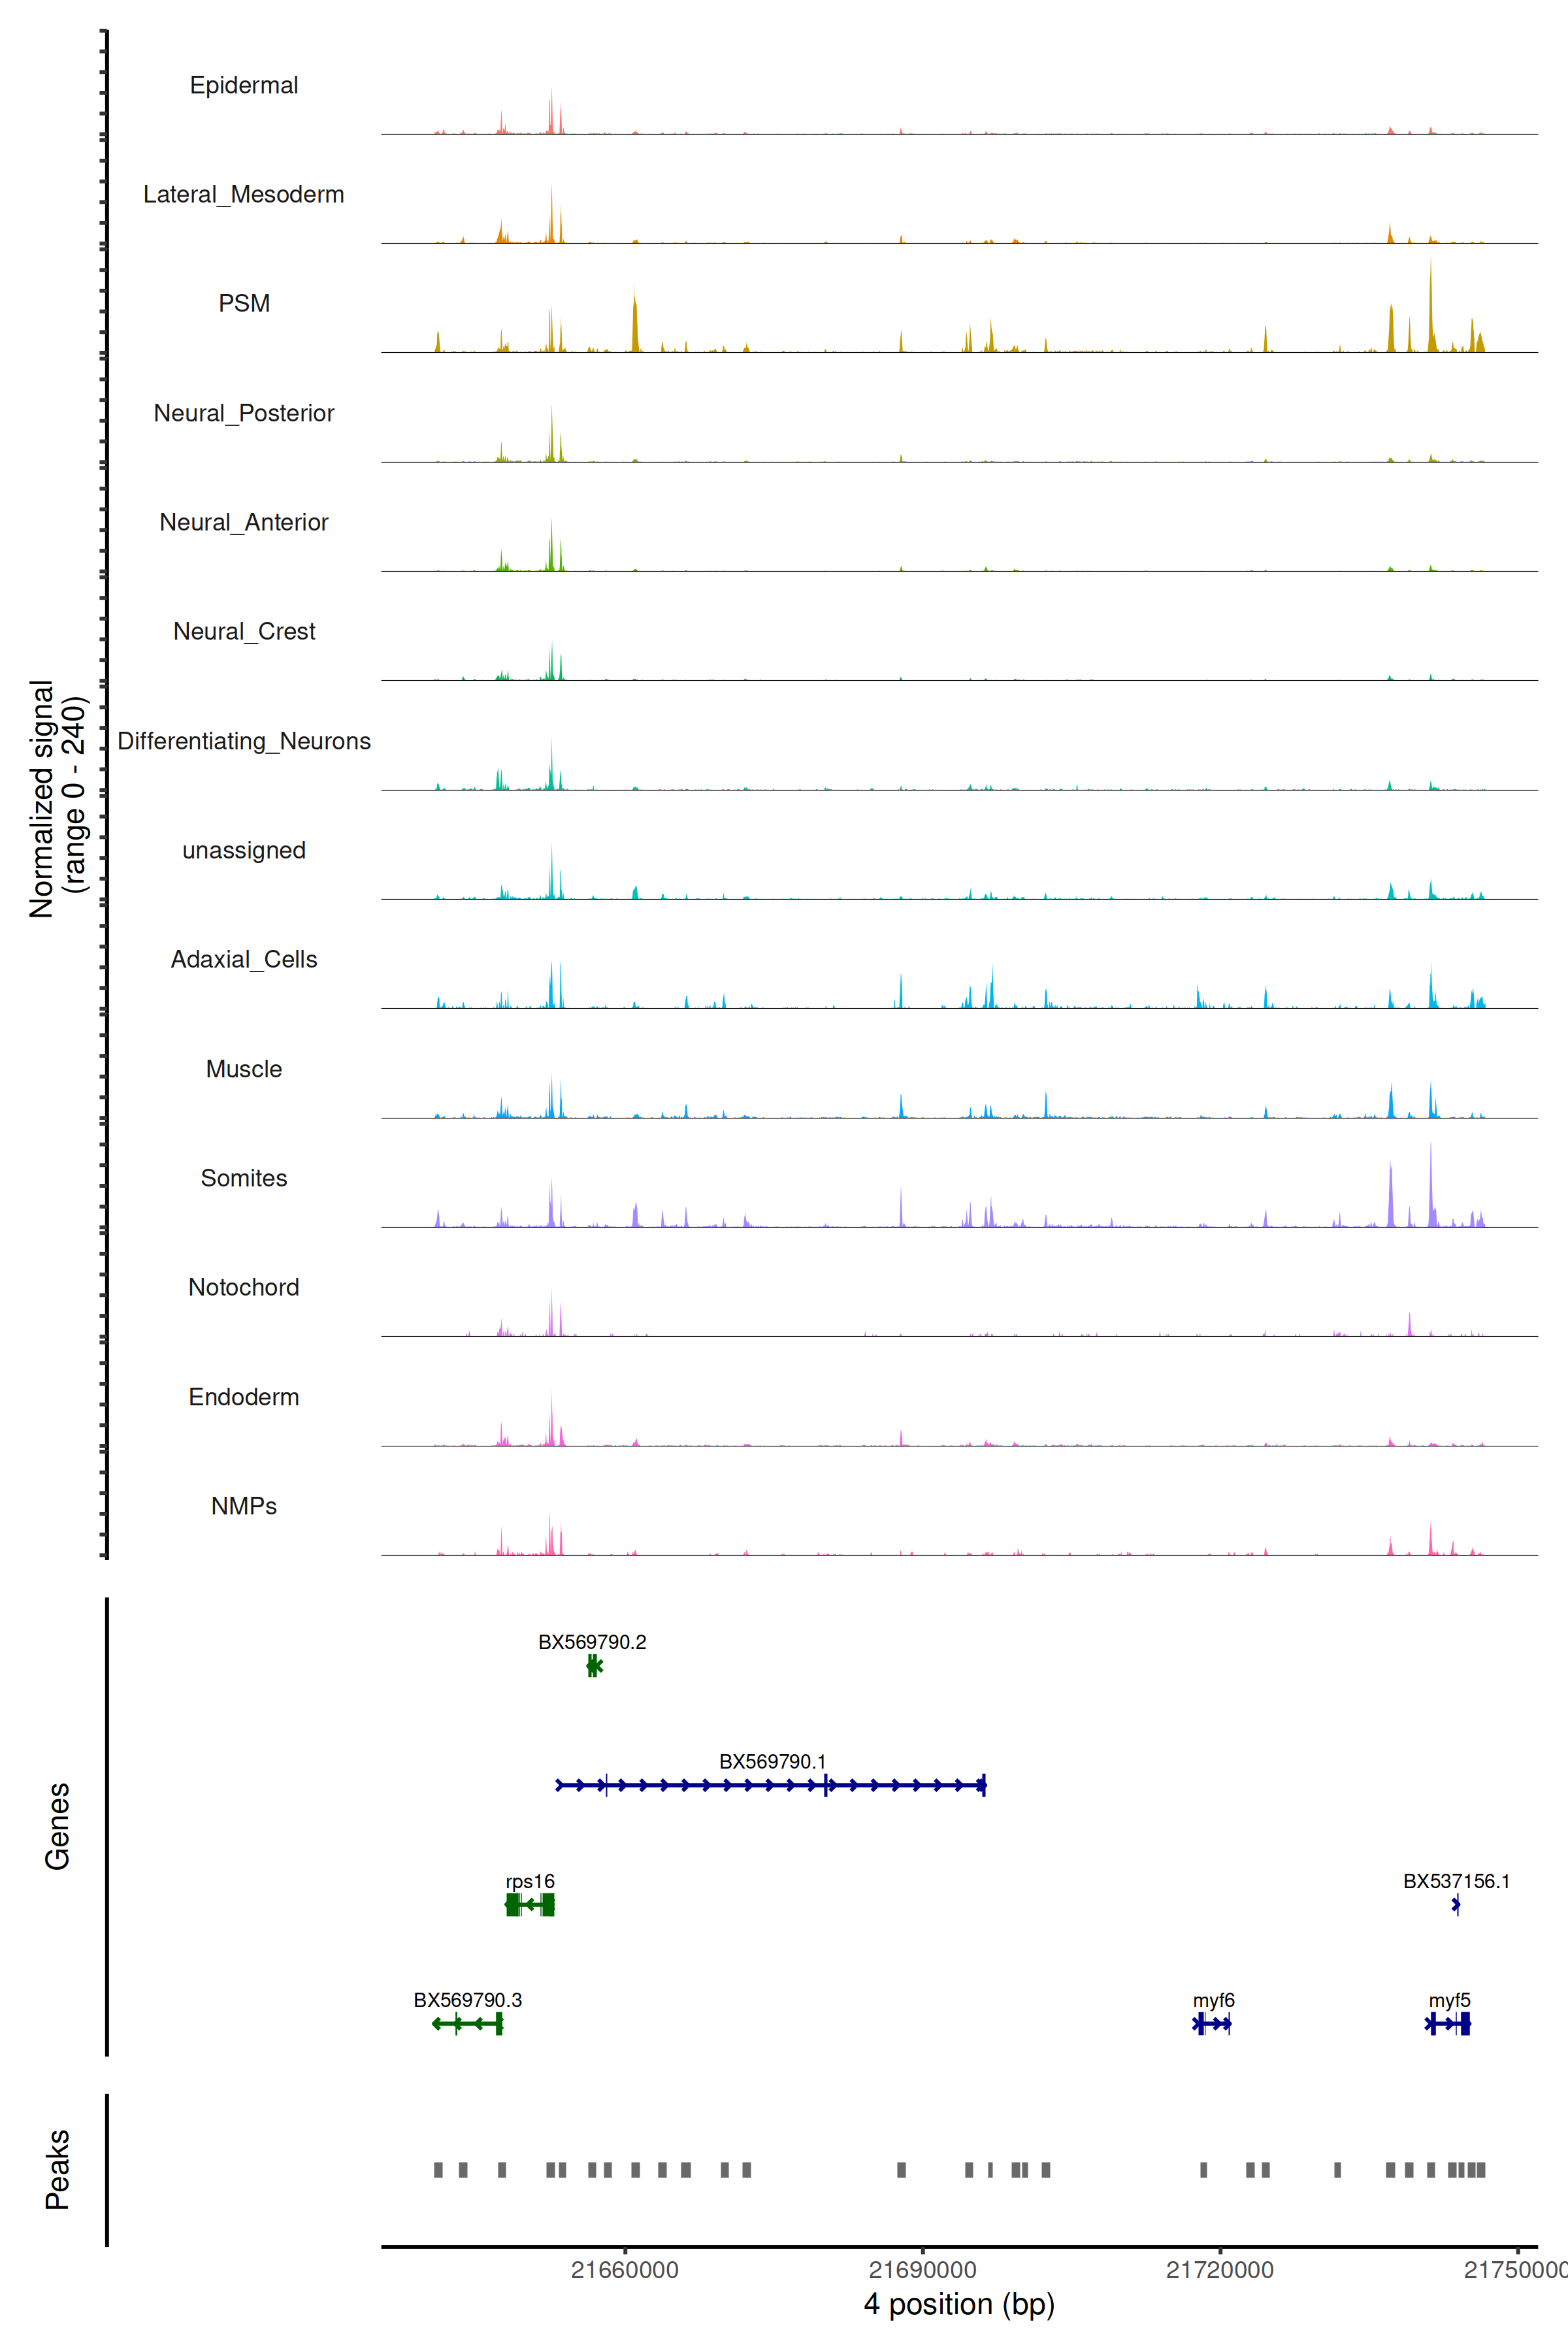

In [22]:
CoveragePlot(TDR118, region = "4-21640698-21746718")

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


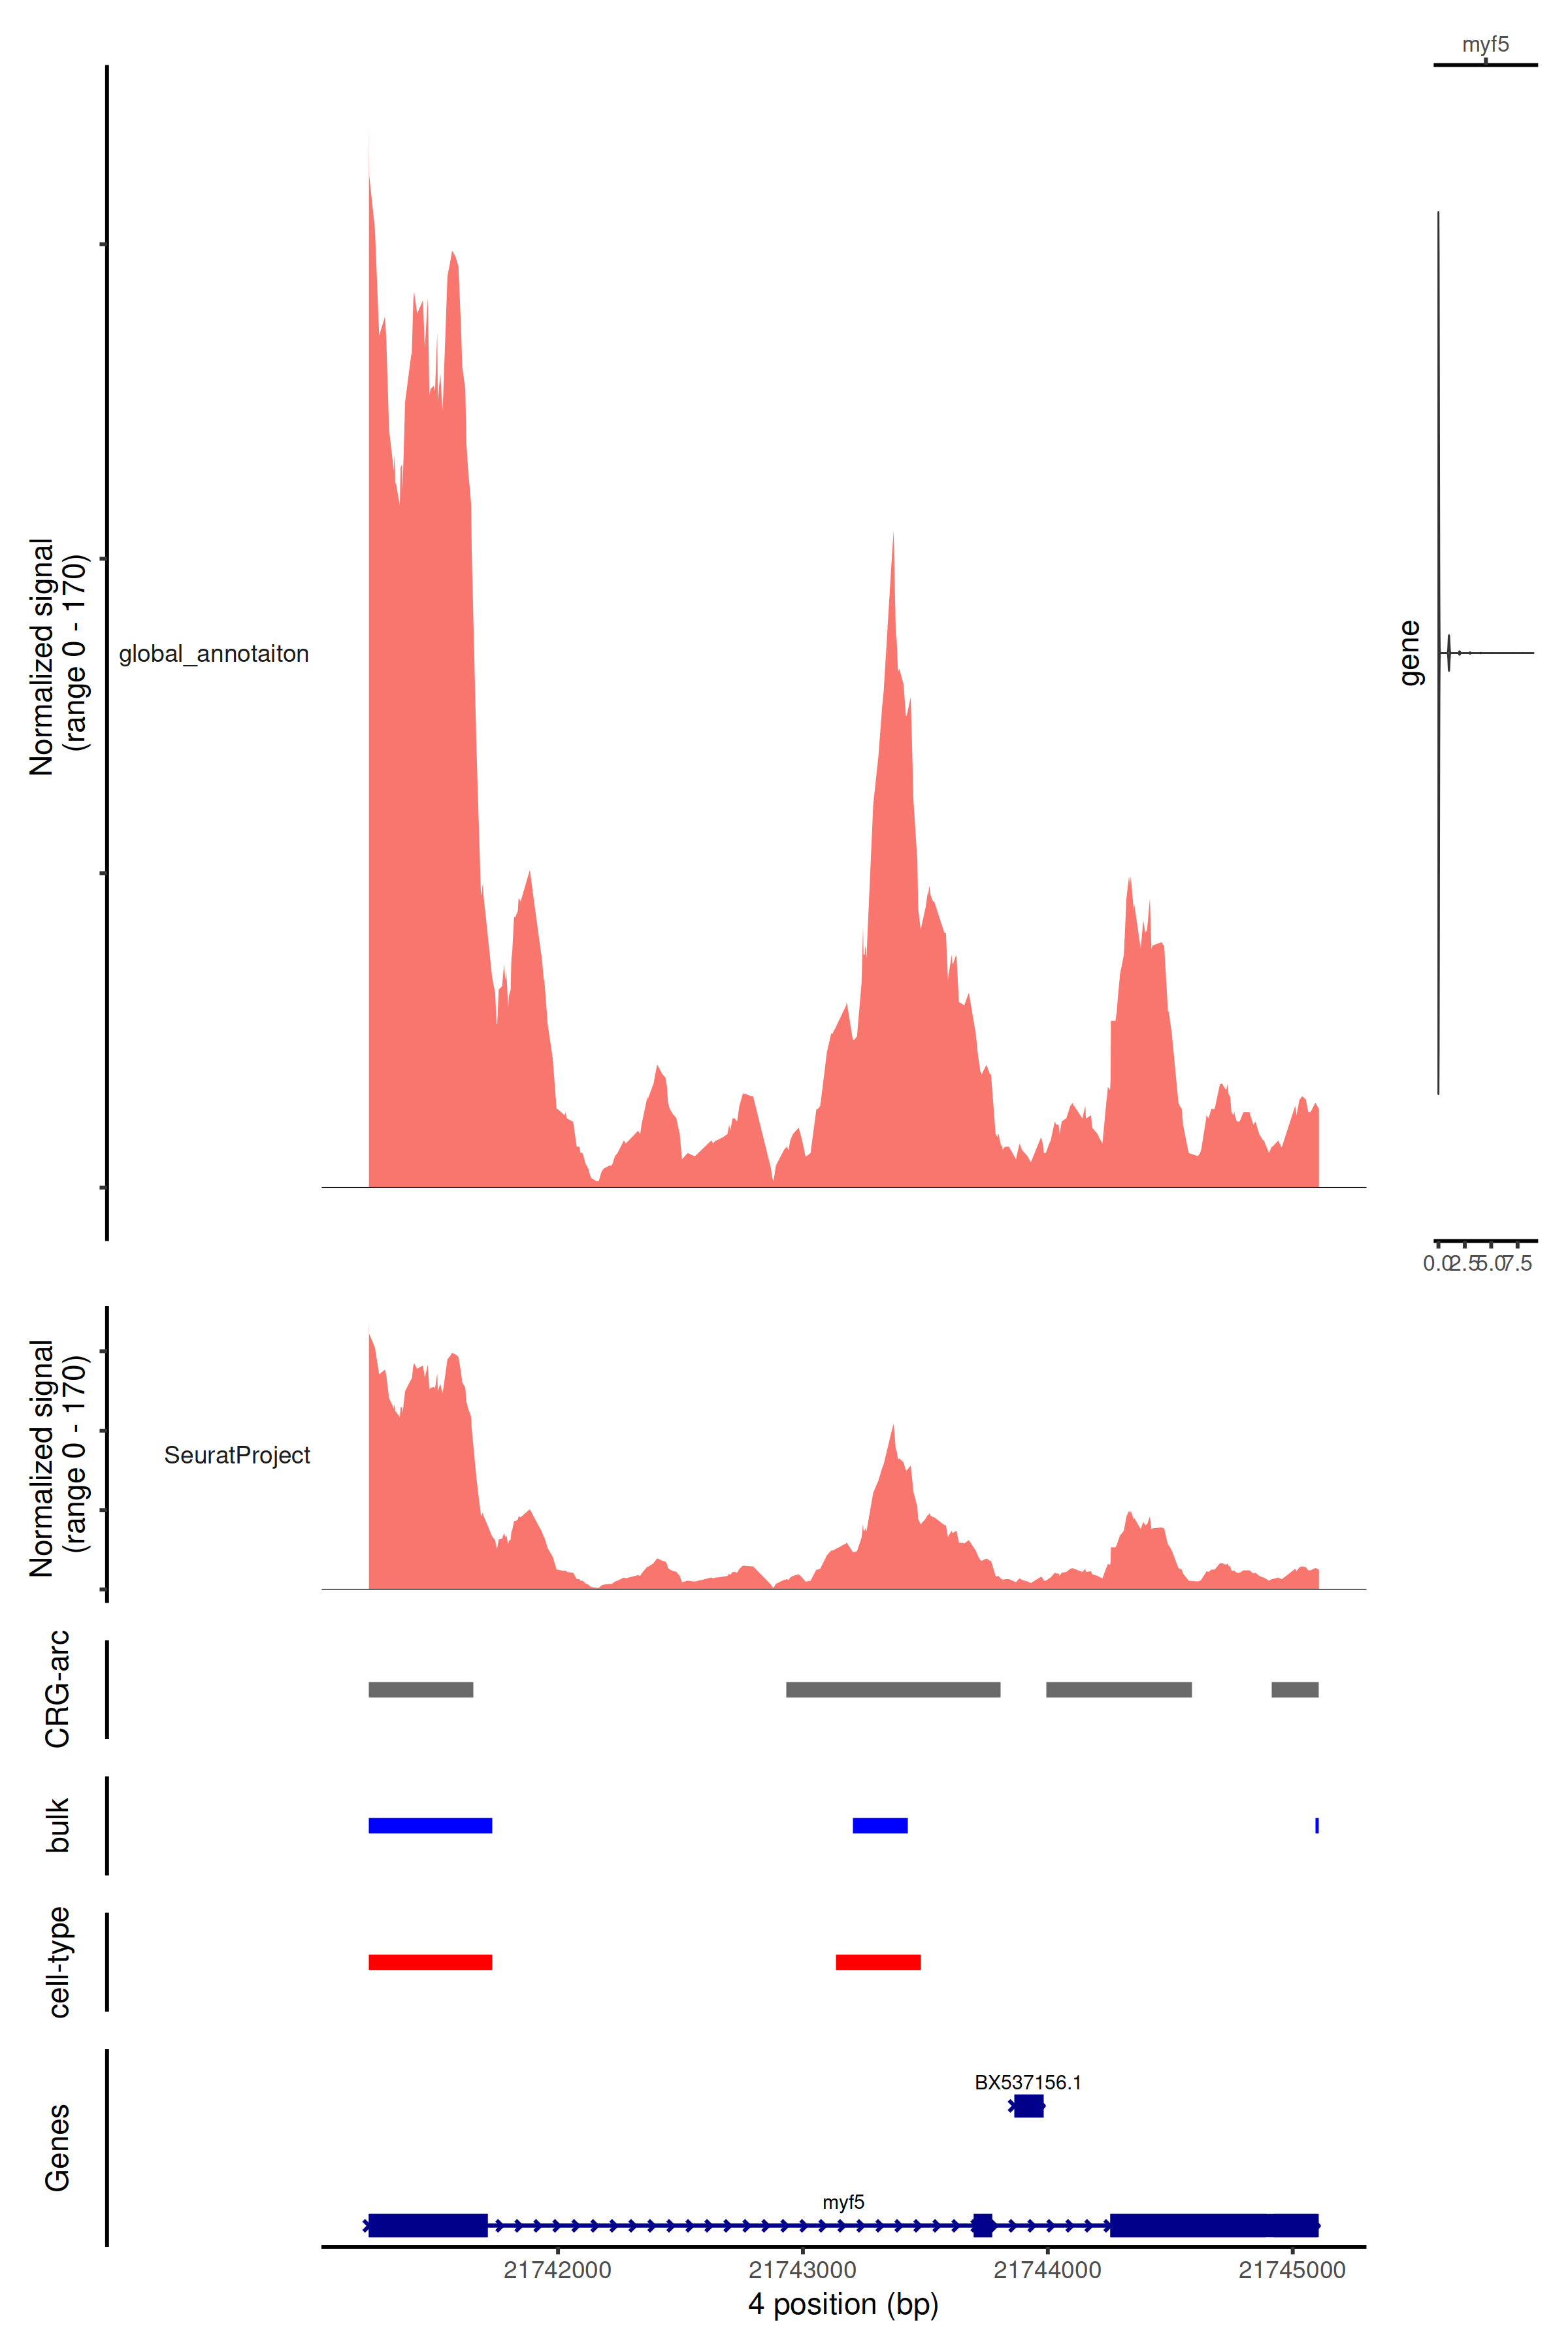

In [8]:
# check for one gene
coverage_plot(TDR118, "myf5")

In [30]:
TDR118@assays$ATAC@ranges

GRanges object with 248320 ranges and 0 metadata columns:
           seqnames            ranges strand
              <Rle>         <IRanges>  <Rle>
       [1]        1         2372-3057      *
       [2]        1         6507-7253      *
       [3]        1       11485-12198      *
       [4]        1       14475-15248      *
       [5]        1       16516-17393      *
       ...      ...               ...    ...
  [248316]        9 56433462-56434391      *
  [248317]        9 56437053-56437849      *
  [248318]        9 56450898-56451686      *
  [248319]        9 56452315-56452858      *
  [248320]        9 56459068-56459827      *
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

In [32]:
unique_peaks_15_20$X<-NULL
unique_peaks_15_20

peak_id,gene_short_name
<chr>,<chr>
chr20_11105433_11106108,flrt2
chr20_15600154_15601120,faslg
chr20_19543851_19544737,mir133b
chr20_19543851_19544737,mir206-1
chr20_26066940_26067539,myct1a
chr20_26682270_26682988,foxq1b
chr20_26899608_26900561,LOC569077
chr20_2729831_2730642,syncrip
chr20_285255_286087,ccn6


In [ ]:
# # Load necessary libraries
# library(dplyr)
# library(GenomicRanges)

# # Process the peak_id to create a GRanges object
# cicero_data <- unique_peaks_15_20 %>%
#   # Split peak_id into components
#   tidyr::separate(peak_id, into = c("chr", "start", "end"), sep = "_") %>%
#   # Convert start and end to numeric
#   mutate(start = as.numeric(start), end = as.numeric(end)) %>%
#   # Group by gene to find the min start and max end for each gene
#   group_by(gene_short_name) %>%
#   # Summarize to find the range for each gene
#   summarize(start = min(start), end = max(end)) %>%
#   # Create a GRanges object
#   ungroup() %>%
#   mutate(grange = GRanges(seqnames = "4", ranges = IRanges(start = start, end = end)))


In [33]:
# convert the cicero result (CCANs) to GRanges object
library(GenomicRanges)



In [ ]:
# Create a list to store the plot objects
plot_list <- list()

# Loop over top 50 genes with highly variable CCANs (15 somites > 20 somites)
for (gene in list_genes) {
  # Generate the coverage plot for the gene
  plot <- generate_coverage_plots(TDR118, gene)
  
  # Add the plot object to the list
  plot_list[[gene]] <- plot
}

# Create a PDF file
pdf("coverage_plots_15somite_marker_genes.pdf")

# Loop over the plot list and save each plot to a separate page in the PDF
for (gene in list_genes) {
  plot <- plot_list[[gene]]
  print(plot)
}

# Close the PDF file
dev.off()

In [118]:
# list_genes <- list("lrrc17","comp","ripply1","rx1","vsx2","tbx16","myf5",
#                    "hes6","crestin","ednrab","dlx2a","cldni","cfl1l",
#                    "fezf1","sox1b","foxg1a","olig3","hoxd4a","rxrga",
#                    "gata5","myh7","tnnt2a",'pkd1b',"scg3","etv5a","pitx3",
#                    "elavl3","stmn1b","sncb","myog","myl1","jam2a",
#                    "prrx1","nid1b","cpox","gata1a","hbbe1","unc45b","ttn1",
#                    "apobec2a","foxi3b","atp1b1b","fli1b","kdrl","anxa4",
#                    "cldnc","cldn15a","tbx3b","loxl5b","emilin3a","sema3aa","irx7","vegfaa",
#                    "ppl","krt17","icn2","osr1","hand2","shha","shhb","foxa2",
#                    "cebpa","spi1b","myb","ctslb","surf4l","sec61a1l","mcf2lb",
#                    "bricd5","etnk1","chd17","acy3")
# list_genes

[[1]]
[1] "lrrc17"

[[2]]
[1] "comp"

[[3]]
[1] "ripply1"

[[4]]
[1] "rx1"

[[5]]
[1] "vsx2"

[[6]]
[1] "tbx16"

[[7]]
[1] "myf5"

[[8]]
[1] "hes6"

[[9]]
[1] "crestin"

[[10]]
[1] "ednrab"

[[11]]
[1] "dlx2a"

[[12]]
[1] "cldni"

[[13]]
[1] "cfl1l"

[[14]]
[1] "fezf1"

[[15]]
[1] "sox1b"

[[16]]
[1] "foxg1a"

[[17]]
[1] "olig3"

[[18]]
[1] "hoxd4a"

[[19]]
[1] "rxrga"

[[20]]
[1] "gata5"

[[21]]
[1] "myh7"

[[22]]
[1] "tnnt2a"

[[23]]
[1] "pkd1b"

[[24]]
[1] "scg3"

[[25]]
[1] "etv5a"

[[26]]
[1] "pitx3"

[[27]]
[1] "elavl3"

[[28]]
[1] "stmn1b"

[[29]]
[1] "sncb"

[[30]]
[1] "myog"

[[31]]
[1] "myl1"

[[32]]
[1] "jam2a"

[[33]]
[1] "prrx1"

[[34]]
[1] "nid1b"

[[35]]
[1] "cpox"

[[36]]
[1] "gata1a"

[[37]]
[1] "hbbe1"

[[38]]
[1] "unc45b"

[[39]]
[1] "ttn1"

[[40]]
[1] "apobec2a"

[[41]]
[1] "foxi3b"

[[42]]
[1] "atp1b1b"

[[43]]
[1] "fli1b"

[[44]]
[1] "kdrl"

[[45]]
[1] "anxa4"

[[46]]
[1] "cldnc"

[[47]]
[1] "cldn15a"

[[48]]
[1] "tbx3b"

[[49]]
[1] "loxl5b"

[[50]]
[1] "emilin3a"

[[51]]
[1] "sema3aa"

[[52]]
[1] "irx7"

[[53]]
[1] "vegfaa"

[[54]]
[1] "ppl"

[[55]]
[1] "krt17"

[[56]]
[1] "icn2"

[[57]]
[1] "osr1"

[[58]]
[1] "hand2"

[[59]]
[1] "shha"

[[60]]
[1] "shhb"

[[61]]
[1] "foxa2"

[[62]]
[1] "cebpa"

[[63]]
[1] "spi1b"

[[64]]
[1] "myb"

[[65]]
[1] "ctslb"

[[66]]
[1] "surf4l"

[[67]]
[1] "sec61a1l"

[[68]]
[1] "mcf2lb"

[[69]]
[1] "bricd5"

[[70]]
[1] "etnk1"

[[71]]
[1] "chd17"

[[72]]
[1] "acy3"

In [ ]:
# Create a list to store the plot objects
plot_list <- list()

# Loop over 20 genes
for (gene in list_genes) {
  # Generate the coverage plot for the gene
  plot <- generate_coverage_plots(TDR118, gene)
  
  # Add the plot object to the list
  plot_list[[gene]] <- plot
}

# Create a PDF file
pdf("coverage_plots_15somite_marker_genes.pdf")

# Loop over the plot list and save each plot to a separate page in the PDF
for (gene in list_genes) {
  plot <- plot_list[[gene]]
  print(plot)
}

# Close the PDF file
dev.off()

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 23 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows contai

NULL


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


NULL


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


NULL


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows contain

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


$lrrc17


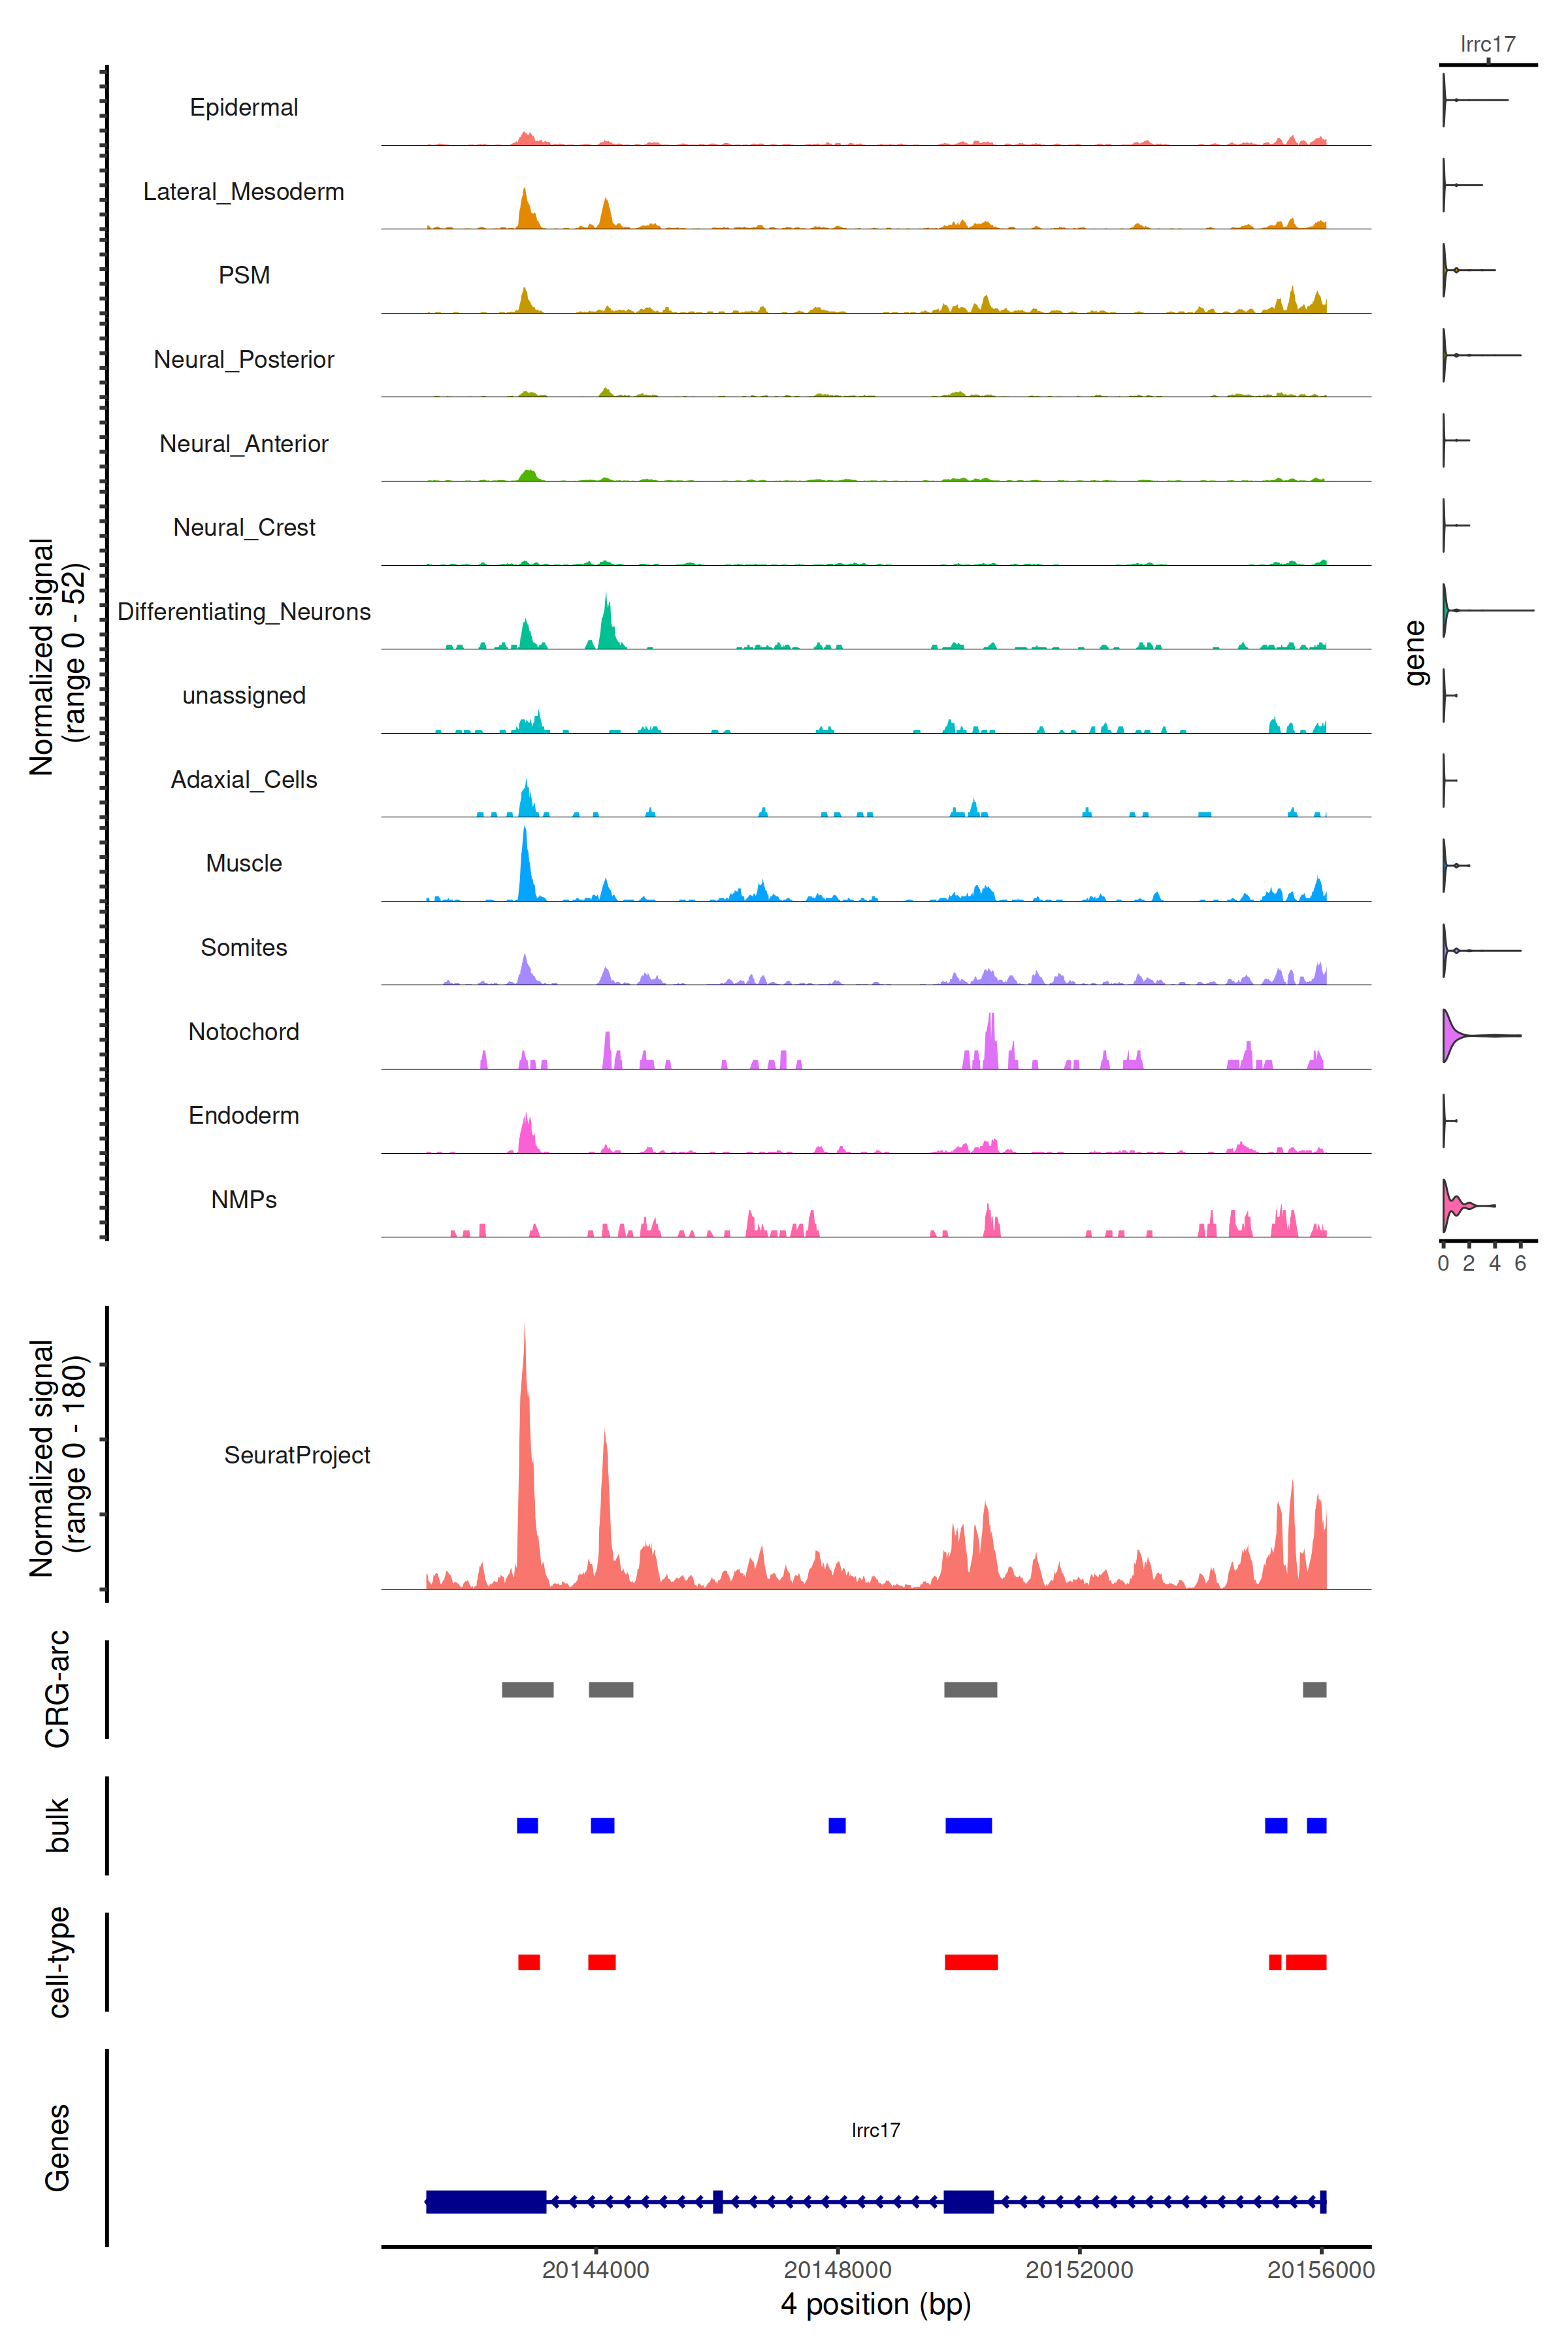

In [134]:
plot_list[1]

## DEPRECATED - intermediate steps to write the custom function (make_coverage_plots)

In [14]:
# check the active.ident
table(Idents(TDR118))


              Epidermal        Lateral_Mesoderm                     PSM 
                   1447                    1864                     730 
       Neural_Posterior         Neural_Anterior            Neural_Crest 
                   1750                    3786                    1004 
Differentiating_Neurons              unassigned           Adaxial_Cells 
                    299                     306                     128 
                 Muscle                 Somites               Notochord 
                    419                     662                      76 
               Endoderm                    NMPs 
                    448                     103 

In [6]:
# extract the gene.coordinates by using "LookupGeneCoords" in Signac
gene.coord <- LookupGeneCoords(object = TDR118, gene = "tbxta")
gene.coord

gene.coord.df <- as.data.frame(gene.coord)
gene.coord.df

GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]       19 14187540-14191592      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

seqnames,start,end,width,strand
<fct>,<int>,<int>,<int>,<fct>
19,14187540,14191592,4053,*


In [15]:
gene.coord <- LookupGeneCoords(object = TDR118, gene = "tbxta")
gene.coord

gene.coord.df <- as.data.frame(gene.coord)
gene.coord.df

chromosome <- gene.coord.df$seqnames
pos_start <- gene.coord.df$start
pos_end <-gene.coord.df$end

GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]       19 14187540-14191592      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

seqnames,start,end,width,strand
<fct>,<int>,<int>,<int>,<fct>
19,14187540,14191592,4053,*


In [17]:
# define a peak name
paste0(chromosome,"-",pos_start,"-",pos_end)

[1] "19-14187540-14191592"

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


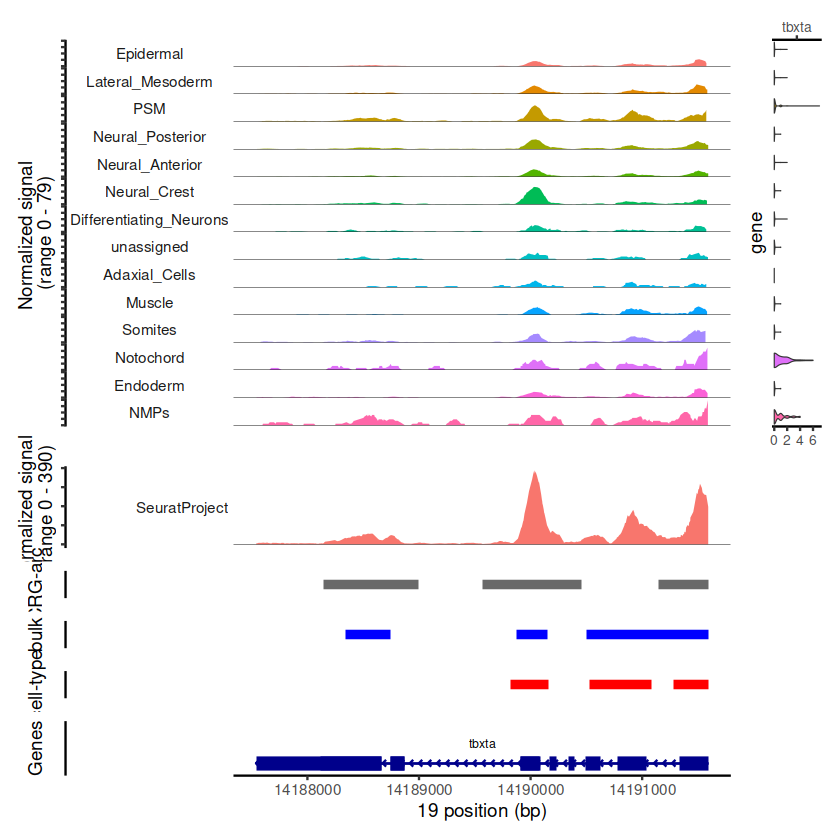

In [103]:
gene = "tbxta"

# Compare the called peaks using a Coverage Plot
Idents(TDR118) <- "orig.ident"

cov_plot_bulk <- CoveragePlot(
  object = TDR118,
  region = "tbxta",
  annotation=FALSE,
  peaks=FALSE
  #ranges = peaks,
  #ranges.title = "MACS2"
)

# we have to manually change the basic identity for Seurat
Idents(TDR118) <- "predicted.id"
cov_plot_celltype <- CoveragePlot(
    object = TDR118, 
    region = "tbxta",
    annotation = FALSE,
    peaks=FALSE
)

# gene annotation
gene_plot <- AnnotationPlot(
  object = TDR118,
  region = "19-14187540-14191592"
)
# gene_plot


# cellranger-arc peaks
peak_plot_CRG <- PeakPlot(
  object = TDR118,
  region = "19-14187540-14191592",
  peaks=TDR118@assays$ATAC@ranges
) + labs(y="CRG-arc")
# peak_plot

# MACS2-bulk peaks
peak_plot_bulk <- PeakPlot(
  object = TDR118,
  region = "19-14187540-14191592",
  peaks=TDR118@assays$peaks_bulk@ranges,
  color = "blue"
)+ labs(y="bulk")

# MACS2-cell-type-specific peaks
peak_plot_celltype <- PeakPlot(
  object = TDR118,
  region = "19-14187540-14191592",
  peaks=TDR118@assays$peaks_celltype@ranges,
  color = "red"
)+ labs(y="cell-type")

# expression of RNA
expr_plot <- ExpressionPlot(
  object = TDR118,
  features = "tbxta",
  assay = "RNA"
)

# Patchwork
# cov_plot/
# (cov_plot_celltype | expr_plot)/
# gene_plot/
# peak_plot_CRG/
# peak_plot_bulk/
# peak_plot_celltype

CombineTracks(
  plotlist = list(cov_plot_celltype, cov_plot_bulk, 
                  peak_plot_CRG, peak_plot_bulk, peak_plot_celltype, 
                  gene_plot),
  expression.plot = expr_plot,
  heights = c(10,3,1,1,1,2),
  widths = c(10, 1)
)

In [26]:
options(repr.plot.width = 8, repr.plot.height = 12, repr.plot.res = 300)

generate_coverage_plots <- function(object, gene, filepath){
    
      # Check if gene exists in GTF file
      if (!gene %in% object@assays$ATAC@annotation$gene_name) {
        cat("Gene", gene, "not found in GTF file. Skipping.\n")
        return(NULL)
      }
    
    # make sure that the major identity is "orig.ident" for bulk peak profile
    Idents(object) <- "orig.ident"
    # peak profile for the bulk counts
    cov_plot_bulk <- CoveragePlot(
      object = object,
      region = gene,
      annotation=FALSE,
      peaks=FALSE
      #ranges = peaks,
      #ranges.title = "MACS2"
    )

    # we have to manually change the basic identity for Seurat
    Idents(object) <- "predicted.id"
    
    # peak profile for the counts (cell-type, predicted.id)
    cov_plot_celltype <- CoveragePlot(
        object = object, 
        region = gene,
        annotation = FALSE,
        peaks=FALSE
    )
    
    # for gene/peak plots, we need to find the genomic locations as the old Signac doesn't take the gene name as an input argument.
    gene.coord <- LookupGeneCoords(object = object, gene = gene)
    gene.coord.df <- as.data.frame(gene.coord)
    
    # extract the chromosome number, start position and end position
    chromosome <- gene.coord.df$seqnames
    pos_start <- gene.coord.df$start
    pos_end <-gene.coord.df$end
    
    # compute the genomic region as "chromsome_number-start-end"
    genomic_region <- paste(chromosome, pos_start, pos_end, sep="-")
    
    # gene annotation
    gene_plot <- AnnotationPlot(
      object = object,
      region = genomic_region
    )
    # gene_plot


    # cellranger-arc peaks
    peak_plot_CRG <- PeakPlot(
      object = object,
      region = genomic_region,
      peaks=object@assays$ATAC@ranges
    ) + labs(y="CRG-arc")
    # peak_plot

    # MACS2-bulk peaks
    peak_plot_bulk <- PeakPlot(
      object = object,
      region = genomic_region,
      peaks=object@assays$peaks_bulk@ranges,
      color = "blue"
    )+ labs(y="bulk")

    # MACS2-cell-type-specific peaks
    peak_plot_celltype <- PeakPlot(
      object = object,
      region = genomic_region,
      peaks=object@assays$peaks_celltype@ranges,
      color = "red"
    )+ labs(y="cell-type")

    # expression of RNA
    expr_plot <- ExpressionPlot(
      object = object,
      features = gene,
      assay = "RNA"
    )

    plot<-CombineTracks(
      plotlist = list(cov_plot_celltype, cov_plot_bulk, 
                      peak_plot_CRG, peak_plot_bulk, peak_plot_celltype, 
                      gene_plot),
      expression.plot = expr_plot,
      heights = c(10,3,1,1,1,2),
      widths = c(10, 1)
    )
    
    options(repr.plot.width = 8, repr.plot.height = 12, repr.plot.res = 300)
#     ggsave(paste0(filepath, "coverage_plot_", gene, "_allpeaks.png"), plot=plot, width=8, height=12)
    return(plot)
    
}

# 

In [112]:
generate_coverage_plots(object = TDR118, gene = "tbxta", 
                        filepath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/coverage_plots_TDR118/")

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


## (Optional)

- Check the regions with negative cicero co-accessibility scores


In [6]:
# import the cicero connections
cicero_connections <- read.csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118_cicero_output/02_TDR118_cicero_connections_CRG_arc_peaks.csv")
head(cicero_connections)

ERROR: Error in cicero_connections.head(): could not find function "cicero_connections.head"


In [34]:
sorted_cicero_connections <- cicero_connections[order(cicero_connections$coaccess, decreasing = FALSE), ]
head(sorted_cicero_connections)

,X,Peak1,Peak2,coaccess
,<int>,<chr>,<chr>,<dbl>
24925716,25080832,24-17160375-17161077,24-17168001-17168928,-0.6733118
24926413,25081532,24-17168001-17168928,24-17160375-17161077,-0.6733118
23966202,24115462,23-32198630-32199562,23-32499634-32500463,-0.6653330
23981455,24130795,23-32499634-32500463,23-32198630-32199562,-0.6653330
11469579,11541064,16-33484518-33485430,16-33655530-33656446,-0.6588027
11481776,11553317,16-33655530-33656446,16-33484518-33485430,-0.6588027


In [33]:
sorted_cicero_connections[sorted_cicero_connections$coaccess < -0.6, ]

,X,Peak1,Peak2,coaccess
,<int>,<chr>,<chr>,<dbl>
24925716,25080832,24-17160375-17161077,24-17168001-17168928,0.6
24926413,25081532,24-17168001-17168928,24-17160375-17161077,0.6
23966202,24115462,23-32198630-32199562,23-32499634-32500463,0.6
23981455,24130795,23-32499634-32500463,23-32198630-32199562,0.6
11469579,11541064,16-33484518-33485430,16-33655530-33656446,0.6
11481776,11553317,16-33655530-33656446,16-33484518-33485430,0.6
9401208,9459959,15-18093330-18094179,15-18340493-18341391,0.6
9414604,9473431,15-18340493-18341391,15-18093330-18094179,0.6
11470495,11541984,16-33494279-33495177,16-33655530-33656446,0.6


In [18]:
library(cicero)

Loading required package: monocle3

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading requi

In [ ]:
ccans <- generate_ccans(cicero_connections)b

In [22]:
region <- sorted_cicero_connections[1, ]$Peak1
region

# # Input string
# input_string <- '24-17160375-17161077'

[1] "24-17160375-17161077"

Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


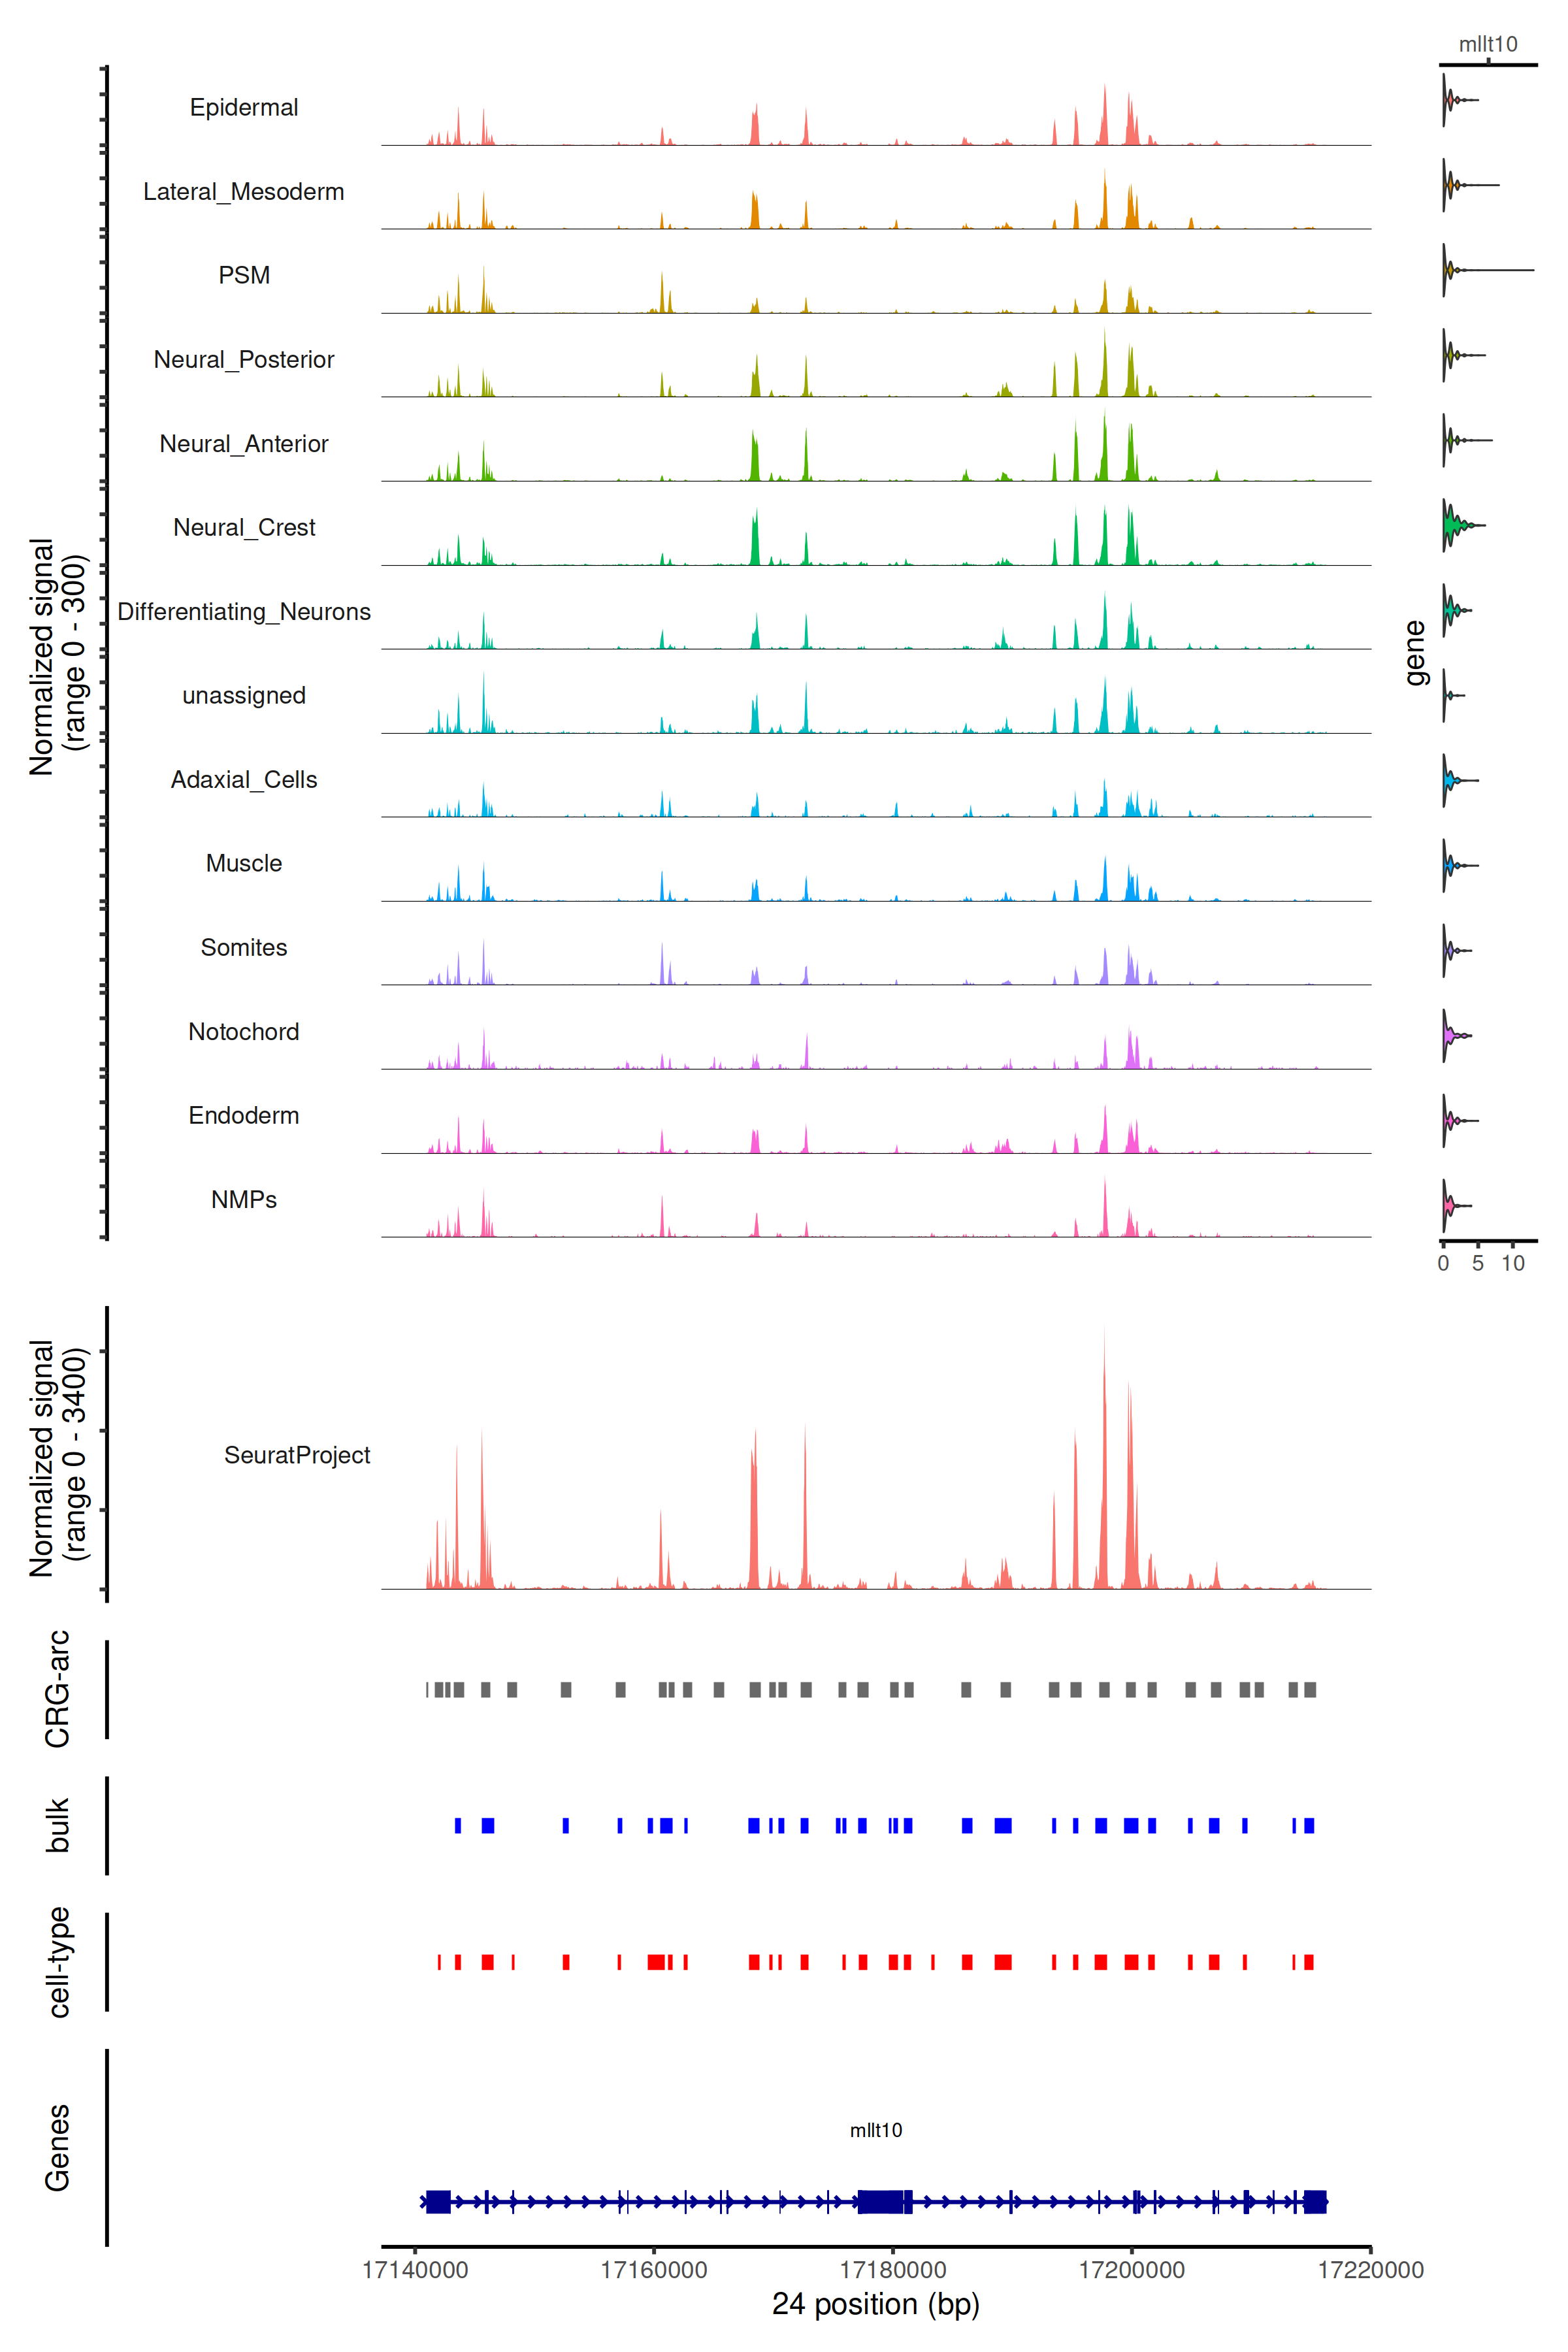

In [27]:
plot <- generate_coverage_plots(TDR118, "mllt10")
plot

# Some hypotheses on the pairs of peaks with highly negative co-accessibilities

- one of the examples, mllt10 has two peaks on the intron regions that are highly negatively correlated (coaccess <-0.6). This might suggest that the pairs of peaks with strong negative co-accessibility might mean that they are within the same gene/transcriptional unit, thus they are not TSS and silencers, rather reporting different transcriptional "states".

- Additional things to check: 

    - whether the highly negatively co-accessible peaks are within the same gene (fraction of peak pairs that were from the same gene).
    - If not, whether they are worth digging into.

Warning message:
"Removed 164 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 164 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


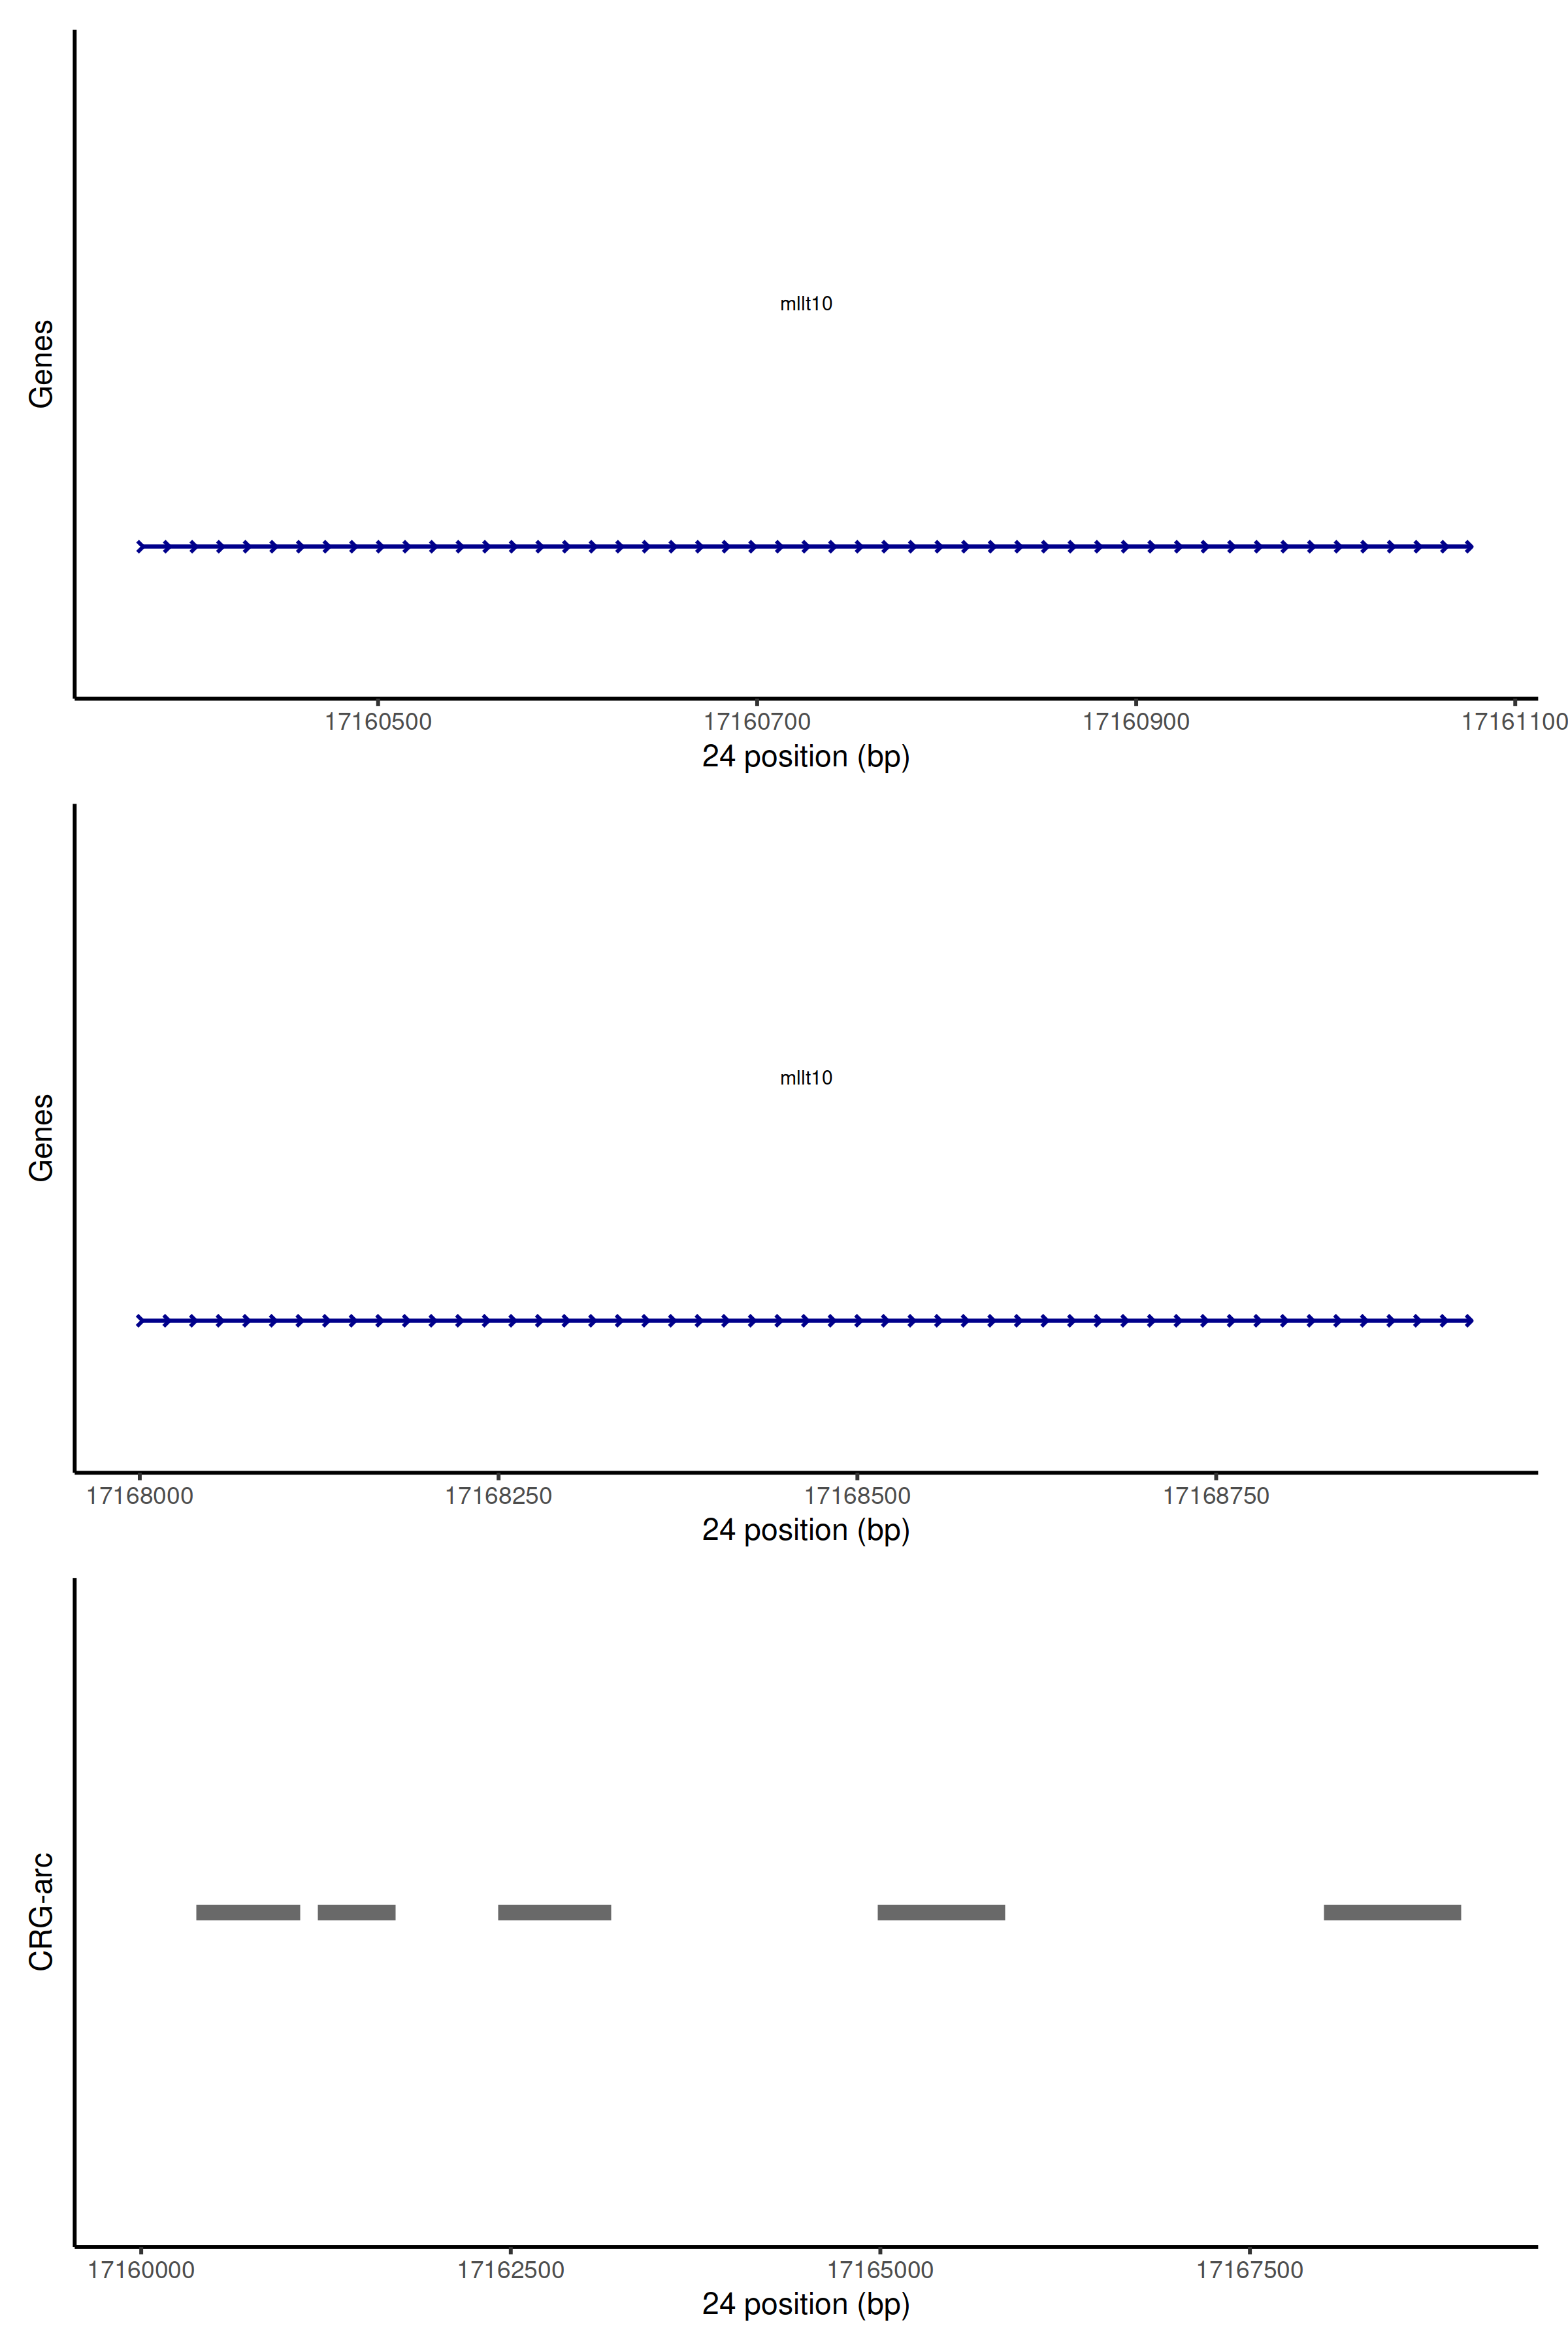

In [36]:
# for gene/peak plots, we need to find the genomic locations as the old Signac doesn't take the gene name as an input argument.
# gene.coord <- LookupGeneCoords(object = object, gene = gene)
# gene.coord.df <- as.data.frame(gene.coord)

cicero_index = 1
region1 = sorted_cicero_connections[cicero_index, ]$Peak1
region2 = sorted_cicero_connections[cicero_index, ]$Peak2
#24-17160375-17161077	24-17168001-17168928

# # extract the chromosome number, start position and end position
# chromosome <- gene.coord.df$seqnames
# pos_start <- gene.coord.df$start
# pos_end <-gene.coord.df$end

# # compute the genomic region as "chromsome_number-start-end"
# genomic_region <- paste(chromosome, pos_start, pos_end, sep="-")

# gene annotation (peak1)
gene_plot1 <- AnnotationPlot(
  object = TDR118,
  region = region1
)
# gene annotation (peak2)
gene_plot2 <- AnnotationPlot(
  object = TDR118,
  region = region2
)



# cellranger-arc peaks
peak_plot_CRG <- PeakPlot(
  object = TDR118,
  region = "24-17160000-17169000",
  peaks=TDR118@assays$ATAC@ranges
) + labs(y="CRG-arc")
# peak_plot


gene_plot1/gene_plot2/peak_plot_CRG



In [58]:
frag_df <- data.frame(
  chrom = fragments@ranges@seqnames,
  start = start(fragments@ranges),
  end = end(fragments@ranges),
  barcode = fragments@cells,
  readCount = fragments@readCount
)

head(frag_df)

ERROR: Error in data.frame(chrom = fragments@ranges@seqnames, start = start(fragments@ranges), : no slot of name "ranges" for this object of class "Fragment"
